# TVOC Calibration
This notebook is dedicated to calibration and/or validating the data gathered during tests in the PRC environmental chambers.

Author: Hagen E. Fritz <br>
Date: 06/06/2020 <br>
Experiment Details:
- Start Date: May 22th, 2020
- End Date: 

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import os

# Data Import
The only beacons used for this test are numbers 12 and 20.

In [32]:
def combine(beacon='00'):
    '''
    Reads in raw data and combines a specific beacons py2 and py3 datafiles into one dataframe
    '''
    
    py2 = pd.DataFrame()
    for file in os.listdir(f'../data/raw/bpeace2/beacon/B{beacon}/sensirion/'):
        temp = pd.read_csv(f'../data/raw/bpeace2/beacon/B{beacon}/sensirion/{file}',index_col='Timestamp',parse_dates=True)
        py2 = pd.concat([py2,temp])

    py2 = py2.resample('5T').mean()

    py3 = pd.DataFrame()
    for file in os.listdir(f'../data/raw/bpeace2/beacon/B{beacon}/adafruit/'):
        temp = pd.read_csv(f'../data/raw/bpeace2/beacon/B{beacon}/adafruit/{file}',index_col='Timestamp',parse_dates=True)
        py3 = pd.concat([py3,temp])

    py3 = py3.resample('5T').mean()
    df = pd.merge(left=py3,left_index=True,right=py2,right_index=True,how='outer')
    df = df[datetime(2020,5,22):]
    
    return df, py2, py3

## Combining and Saving to Interim

In [33]:
b12,b12_2,b12_3 = combine('12')
b12.to_csv(f'../data/interim/calibration_tvoc_b12-06_2020.csv')
b20,b20_2,b20_3 = combine('20')
b20.to_csv(f'../data/interim/calibration_tvoc_b20-06_2020.csv')

# Visualization

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

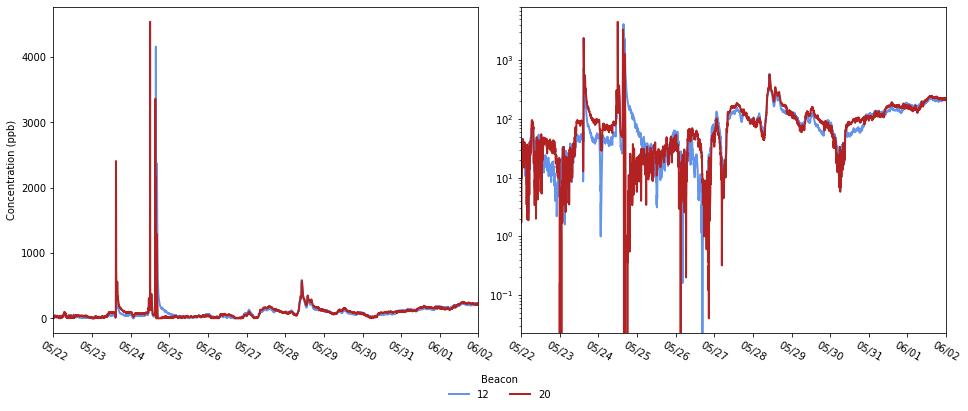

In [67]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
ax[0].plot(b12.index,b12['TVOC'],linewidth=2,color='cornflowerblue')
ax[0].plot(b20.index,b20['TVOC'],linewidth=2,color='firebrick')
ax[0].set_xlim([datetime(2020,5,22),datetime(2020,6,2)])
ax[0].set_ylabel('Concentration (ppb)')
plt.yscale('log')
ax[1].plot(b12.index,b12['TVOC'],linewidth=2,color='cornflowerblue',label='12')
ax[1].plot(b20.index,b20['TVOC'],linewidth=2,color='firebrick',label='20')
ax[1].set_xlim([datetime(2020,5,22),datetime(2020,6,2)])
ax[1].legend(title='Beacon',loc='upper center',bbox_to_anchor=(-0.05,-0.1),frameon=False,ncol=2)

for axes in ax.flat:
    plt.setp(axes.get_xticklabels(), rotation=-30)
    axes.xaxis.set_major_locator(mdates.DayLocator())
    axes.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.1, hspace=None)
plt.show()
plt.close()